In [19]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [20]:
# read
n_LF, n_HF, rel_error = np.loadtxt('error_function_Frontera.txt', unpack=True, usecols=(0,1,2))

In [21]:
error_mean = rel_error.mean()
error_var = np.var(rel_error)

In [22]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    eta = pm.Normal("eta", mu=10, sigma=1)
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = pm.LogNormal("rho", mu=1, sigma=1)
    beta_L = pm.Normal("beta_L", mu=1, sigma=.3)
    beta_H = pm.Normal("beta_H", mu=3, sigma=1)
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = pm.Normal("beta_H2", mu=3, sigma=1)
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = pm.Normal("alpha_L", mu=10, sigma=3)
    alpha_1 = pm.Normal("alpha_1", mu=10, sigma=3)
    alpha_2 = pm.Normal("alpha_2", mu=10, sigma=3)
    # rho_H = pm.Normal("rho_H", mu=1, sigma=.2)

    sigma = pm.HalfNormal("sigma", sigma=.1)

    # Expected value of outcome
    mu = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))

    # Likelihood (sampling distribution) of observations
    rel_error_obs = pm.Normal("rel_error_obs", mu=mu, sigma=sigma, observed=np.log10(rel_error))

In [23]:
error_mean

0.046551409833333335

In [24]:
with basic_model:
    # draw 2000 posterior samples
    # idata = pm.sample(2000, tune=1000)
    idata = pm.sample(6000, tune=2000, chains=4) # chains=6 would still use 4 cores

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta, rho, beta_L, beta_H, beta_H2, alpha_L, alpha_1, alpha_2, sigma]


Output()

Sampling 4 chains for 2_000 tune and 6_000 draw iterations (8_000 + 24_000 draws total) took 106 seconds.


In [25]:
dict(idata)

{'posterior': <xarray.Dataset> Size: 2MB
 Dimensions:  (chain: 4, draw: 6000)
 Coordinates:
   * chain    (chain) int64 32B 0 1 2 3
   * draw     (draw) int64 48kB 0 1 2 3 4 5 6 ... 5994 5995 5996 5997 5998 5999
 Data variables:
     alpha_1  (chain, draw) float64 192kB 5.193 5.599 4.401 ... 10.98 9.286 8.782
     alpha_2  (chain, draw) float64 192kB 19.77 20.55 19.89 ... 24.32 23.57 23.2
     alpha_L  (chain, draw) float64 192kB 3.073 6.479 5.205 ... 10.65 11.44 10.52
     beta_H   (chain, draw) float64 192kB 0.7522 0.7523 0.7914 ... 0.7308 0.7246
     beta_H2  (chain, draw) float64 192kB 2.018 1.995 2.009 ... 1.926 1.921 1.913
     beta_L   (chain, draw) float64 192kB 1.141 1.137 1.143 ... 1.193 1.236 1.246
     eta      (chain, draw) float64 192kB 9.433 8.674 8.769 ... 9.739 9.874 9.262
     rho      (chain, draw) float64 192kB 0.2534 0.2808 0.3185 ... 0.3082 0.3402
     sigma    (chain, draw) float64 192kB 0.09313 0.09063 ... 0.09631 0.09427
 Attributes:
     created_at:           

In [26]:
idata.posterior.data_vars

Data variables:
    alpha_1  (chain, draw) float64 192kB 5.193 5.599 4.401 ... 10.98 9.286 8.782
    alpha_2  (chain, draw) float64 192kB 19.77 20.55 19.89 ... 24.32 23.57 23.2
    alpha_L  (chain, draw) float64 192kB 3.073 6.479 5.205 ... 10.65 11.44 10.52
    beta_H   (chain, draw) float64 192kB 0.7522 0.7523 0.7914 ... 0.7308 0.7246
    beta_H2  (chain, draw) float64 192kB 2.018 1.995 2.009 ... 1.926 1.921 1.913
    beta_L   (chain, draw) float64 192kB 1.141 1.137 1.143 ... 1.193 1.236 1.246
    eta      (chain, draw) float64 192kB 9.433 8.674 8.769 ... 9.739 9.874 9.262
    rho      (chain, draw) float64 192kB 0.2534 0.2808 0.3185 ... 0.3082 0.3402
    sigma    (chain, draw) float64 192kB 0.09313 0.09063 ... 0.09631 0.09427

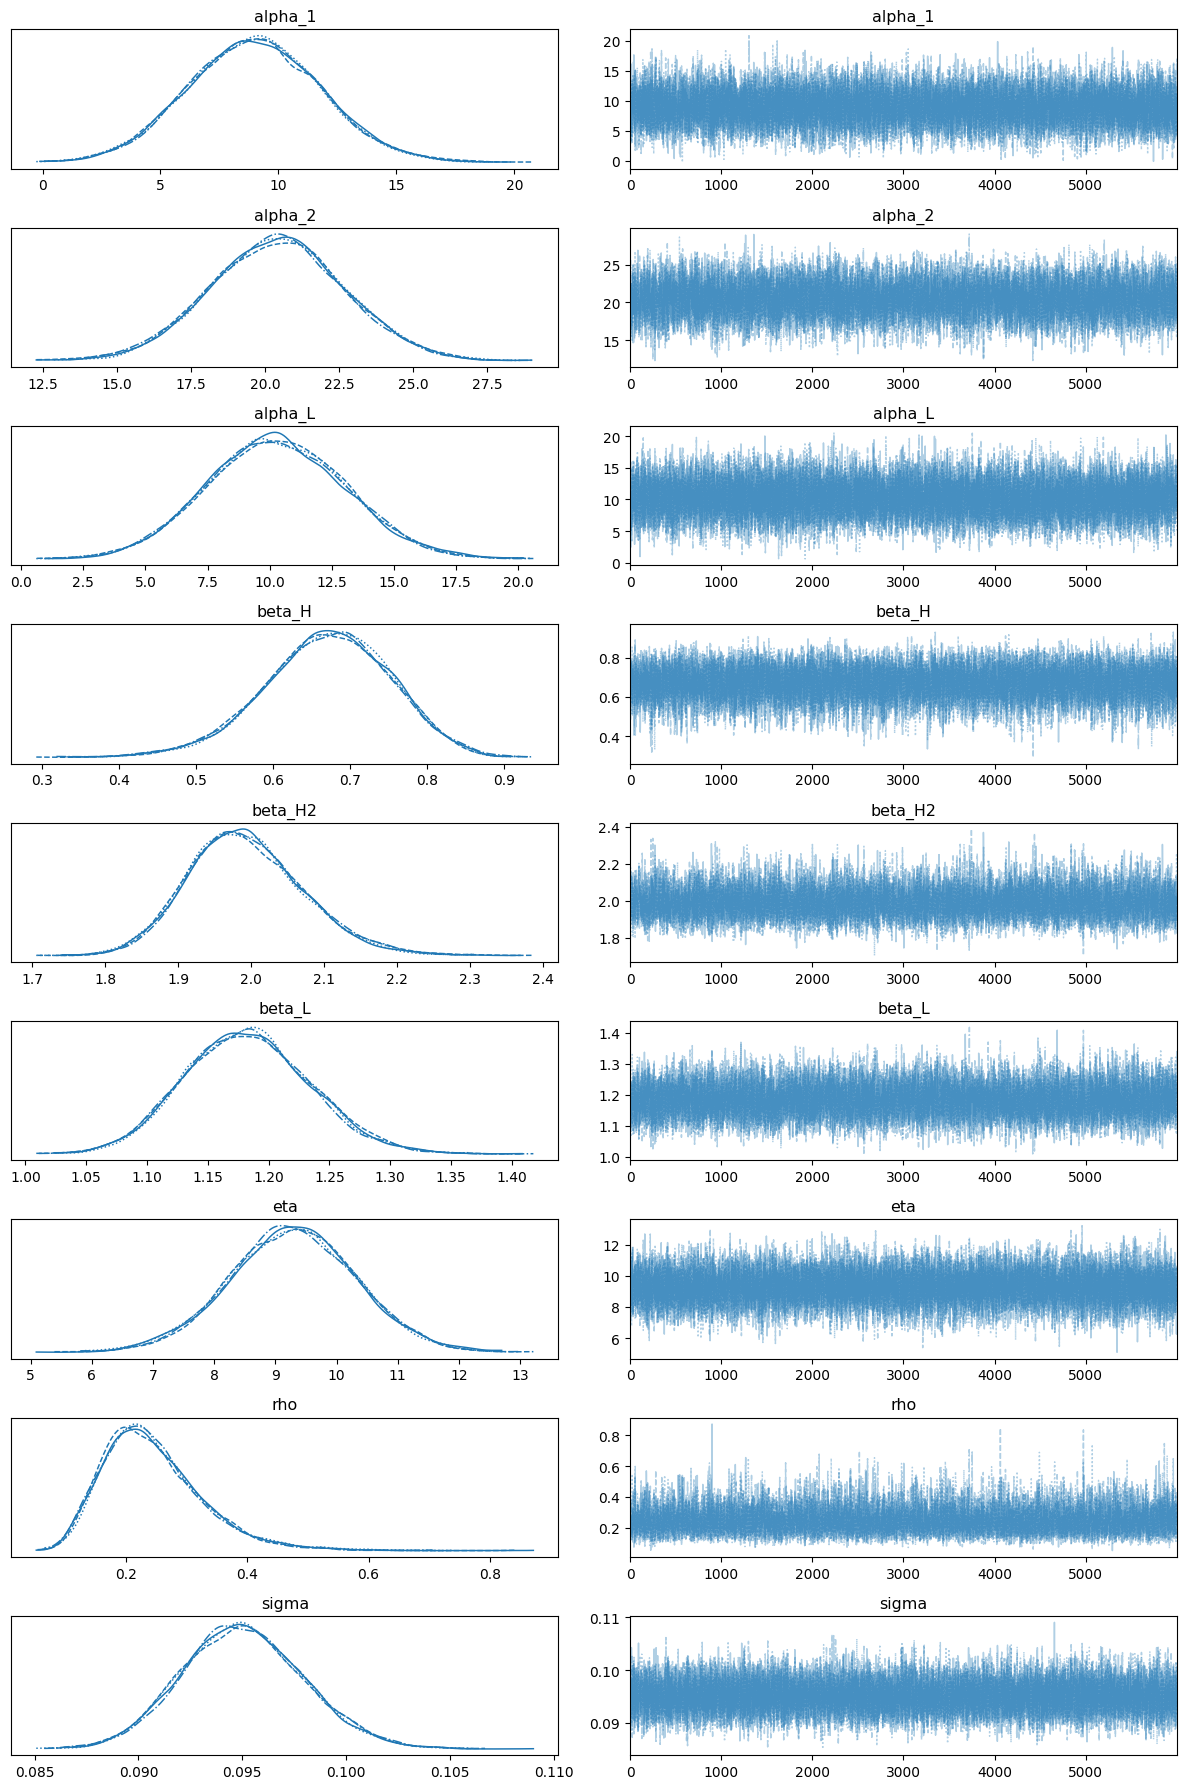

In [27]:
az.plot_trace(idata)
plt.tight_layout()

In [28]:
posterior_eta = idata["posterior"]["eta"]
credible_interval_eta = np.percentile(posterior_eta, [16, 50, 84])
posterior_rho = idata["posterior"]["rho"]
credible_interval_rho = np.percentile(posterior_rho, [16, 50, 84])
posterior_beta_L = idata["posterior"]["beta_L"]
credible_interval_beta_L = np.percentile(posterior_beta_L, [16, 50, 84])
posterior_beta_H = idata["posterior"]["beta_H"]
credible_interval_beta_H = np.percentile(posterior_beta_H, [16, 50, 84])
print(credible_interval_eta)
print(credible_interval_rho)
print(credible_interval_beta_L)
print(credible_interval_beta_H)


[ 8.26444625  9.28517322 10.30443185]
[0.16661994 0.23175897 0.32057815]
[1.13141688 1.18133479 1.23398938]
[0.58994748 0.67336024 0.75212314]


In [29]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_1,8.992,2.798,3.738,14.294,0.024,0.017,14074.309,13889.162,1.0
alpha_2,20.425,2.258,16.167,24.652,0.022,0.016,10495.007,13229.869,1.0
alpha_L,10.285,2.776,5.057,15.454,0.021,0.015,17565.177,16837.333,1.0
beta_H,0.670,0.082,0.521,0.828,0.001,0.001,12528.605,12597.755,1.0
beta_H2,1.993,0.079,1.848,2.144,0.001,0.001,9525.006,10828.682,1.0
beta_L,1.182,0.051,1.088,1.280,0.000,0.000,11146.171,14045.659,1.0
eta,9.284,1.034,7.333,11.258,0.008,0.005,17821.463,15180.701,1.0
rho,0.244,0.082,0.108,0.398,0.001,0.001,9734.993,11960.913,1.0
sigma,0.095,0.003,0.090,0.101,0.000,0.000,21673.934,16674.028,1.0


In [30]:
posterior_eta.values.flatten()

array([9.43290088, 8.67443399, 8.76873346, ..., 9.73926579, 9.87429639,
       9.26235002])

In [31]:
# Alternative method to find mode using histogram
def get_histogram_mode(data, bins=500):
    hist, bin_edges = np.histogram(data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    mode = bin_centers[np.argmax(hist)]
    return mode

# Extracting modes using histogram method for comparison
hist_modes = {}
for var in idata.posterior.data_vars:
    samples = idata.posterior[var].values.flatten()
    mode = get_histogram_mode(samples)
    hist_modes[var] = mode

print("Histogram modes of each posterior:")
for var, mode in hist_modes.items():
    print(f"{var}: {mode}")

Histogram modes of each posterior:
alpha_1: 9.111868253621525
alpha_2: 20.452430536673493
alpha_L: 10.50876698464985
beta_H: 0.6429667185017647
beta_H2: 1.9648651818239626
beta_L: 1.1932332235720637
eta: 9.162766301541993
rho: 0.23119916452463424
sigma: 0.09486860564547148


In [32]:
from scipy.stats import gaussian_kde

# Assuming `idata` is your InferenceData object with posterior samples
posterior_samples = idata.posterior

# Function to compute the mode using KDE
def get_mode_kde(data):
    kde = gaussian_kde(data)
    x_grid = np.linspace(min(data), max(data), 1000)
    mode = x_grid[np.argmax(kde(x_grid))]
    return mode

# Extracting modes for each parameter using KDE
kde_modes = {}
for var in idata.posterior.data_vars:
    samples = idata.posterior[var].values.flatten()
    mode = get_mode_kde(samples)
    kde_modes[var] = mode

print("KDE modes of each posterior:")
for var, mode in kde_modes.items():
    print(f"{var}: {mode}")


KDE modes of each posterior:
alpha_1: 9.10013812613629
alpha_2: 20.561485717252232
alpha_L: 10.03732450383468
beta_H: 0.6743814959573078
beta_H2: 1.9705925966281697
beta_L: 1.1864505662159723
eta: 9.256508172118671
rho: 0.21082638546538143
sigma: 0.09490244703185001


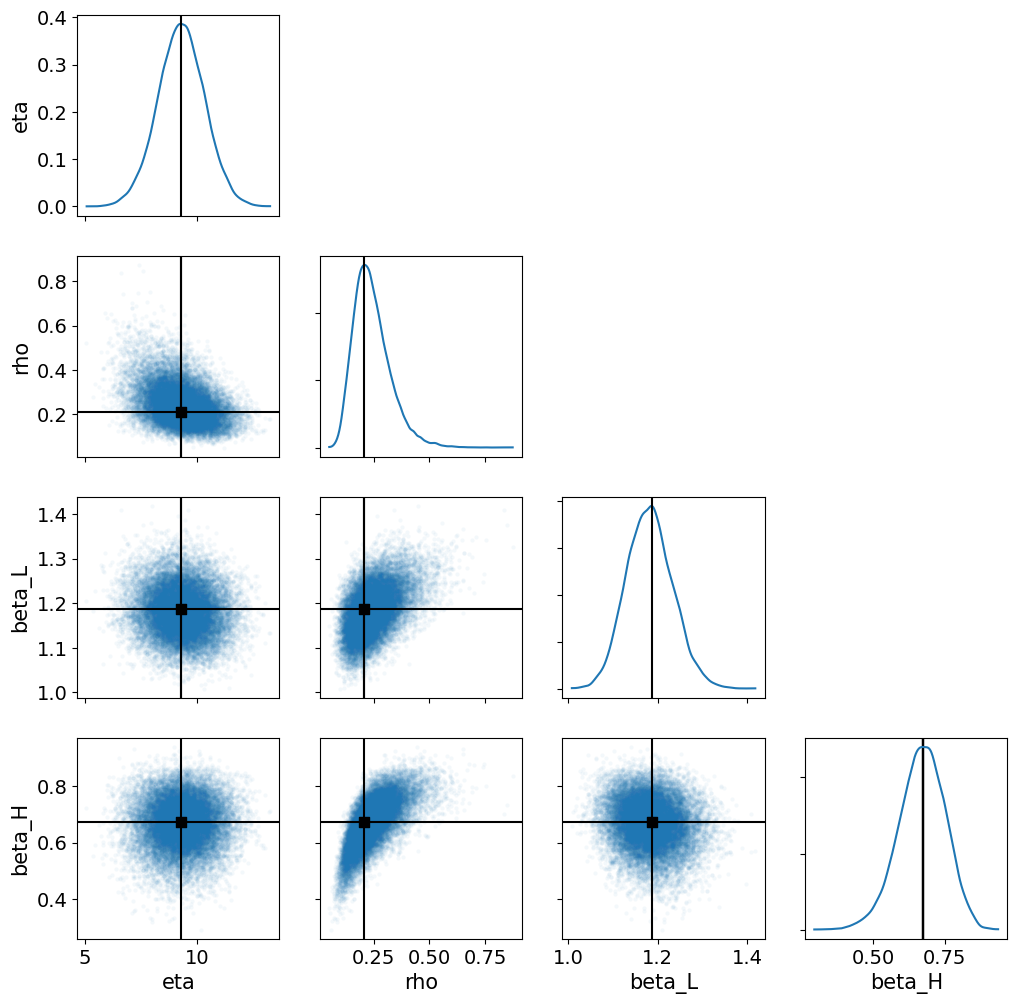

In [33]:
az.plot_pair(
    idata,
    marginals=True,
    point_estimate="mode",
    figsize=(12, 12),
    scatter_kwargs={"alpha": 0.05},
    var_names=["eta", "rho", "beta_L", "beta_H"],
);

In [38]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import gaussian_kde
import arviz as az  # Assume idata is an ArviZ InferenceData object

# Assume `idata` is your InferenceData object with posterior samples
posterior_samples = idata.posterior

# Define a function to evaluate the joint density using KDE
def joint_kde_density(point, samples):
    kde = gaussian_kde(samples.T)  # Transpose for proper shape
    return -kde(point)  # Negative because we are minimizing

# Extract the samples of all four parameters of interest
param_names = ['rho', 'eta', 'beta_L', 'beta_H', 'beta_H2', 'alpha_L', 'alpha_1', 'alpha_2', 'sigma']  # Replace with actual parameter names
sample_arrays = [posterior_samples[param].values.flatten() for param in param_names]

# Combine samples into a 2D array for joint distribution
joint_samples = np.vstack(sample_arrays).T

# Initial guess for the optimizer (mean of samples can be a good starting point)
initial_guess = np.mean(joint_samples, axis=0)

# Perform the optimization to find the mode
result = minimize(joint_kde_density, initial_guess, args=(joint_samples,), method='L-BFGS-B')

# The result contains the mode of the joint distribution
global_mode = result.x

# Print the global mode of the joint distribution
print(f"Global mode of the joint distribution ({', '.join(param_names)}): {global_mode}")

Global mode of the joint distribution (rho, eta, beta_L, beta_H, beta_H2, alpha_L, alpha_1, alpha_2, sigma): [ 0.23346471  9.14709251  1.18626015  0.66452116  1.9791696   9.88180657
  9.04729438 20.49538774  0.09441348]


In [35]:
# define the error function 2 param modes
def error_function(n_LF, n_HF):
    eta = 11.20294568777112
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 34422.595850790254
    beta_L = 1.1406839520015446
    beta_H = 4.145389781446169
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = 2.713544143928366
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 7.8176404049598816
    alpha_1 = 18.553167013696203
    alpha_2 = 7.5153891398955235

    sigma_lg_Phi = 0.21450697746101002   # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return median_Phi

In [36]:
# loss  mean
lg_phi = np.log10(error_function(n_LF, n_HF))
loss = np.mean((lg_phi - np.log(rel_error))**2)

In [37]:
loss

4.632325106349383